<a href="https://colab.research.google.com/github/markjschmidt/PET_List/blob/main/MJS_Sonnet4_Randoms_list_data_20250711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

v11 7/11/2025



Upload the src_at_bottom_24934.txt file:


Saving listPrint_Randoms2min_250k.txt to listPrint_Randoms2min_250k (1).txt
Successfully processed the file. Created a DataFrame with 224440 rows.

=== COMPREHENSIVE DATA ANALYSIS ===
DataFrame shape: (224440, 5)

xa range: 0 to 491
xb range: 84 to 575
tof range: -119 to 119

Number of unique xa values: 492
Number of unique xb values: 492
Number of unique tof values: 239

TOF Statistics:
Mean TOF: -0.08
Median TOF: 0.00
Standard deviation: 67.66

Sample of data:
    xa   xb  tof
0   43  340  -31
1  311  440   51
2  364  503  -64
3   67  511   89
4   35  187  -17
5   69  391  -47
6  243  457  -14
7   82  443   50
8  392  528   28
9   34  447  -90

Creating 3D matplotlib scatter plot...


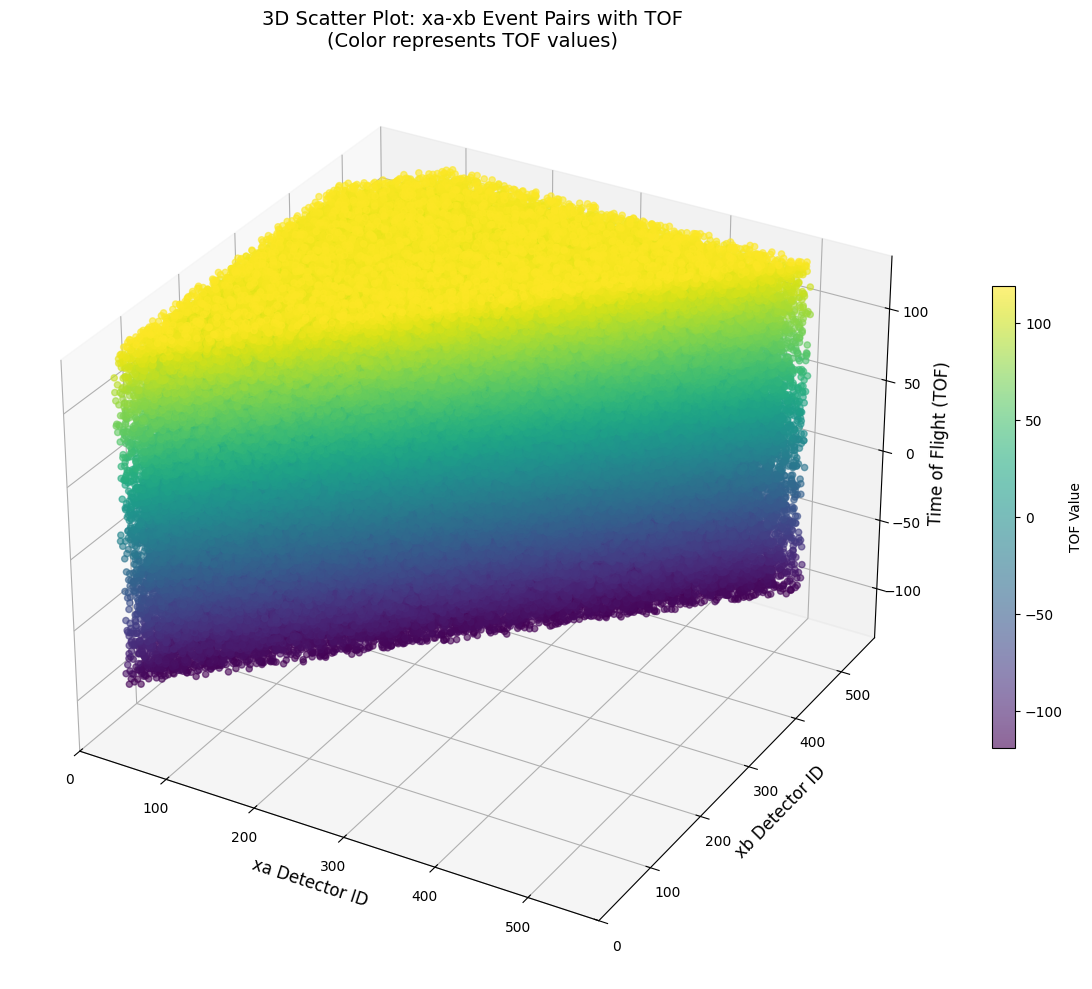


Creating interactive 3D Plotly scatter plot...



Creating interactive circular PET ring visualization...

=== TOF FILTERING OPTIONS ===
Current dataset TOF range: -119 to 119
TOF statistics:
  Mean: -0.1
  Median: 0.0
  25th percentile: -57.0
  75th percentile: 57.0

Options:
1. Show all events (no TOF filtering)
2. Apply custom TOF range filter
3. Show only negative TOF events (photon hits xb first)
4. Show only positive TOF events (photon hits xa first)
5. Show events near zero TOF (-20 to +20)

Enter your choice (1-5): 5
First sampling: 5,000 events from 224,440 original events
TOF filtering: 961 events remain from 5,000 sampled events



Creating TOF analysis plots...
Note: Using random sample of 5,000 points for scatter plots to improve readability


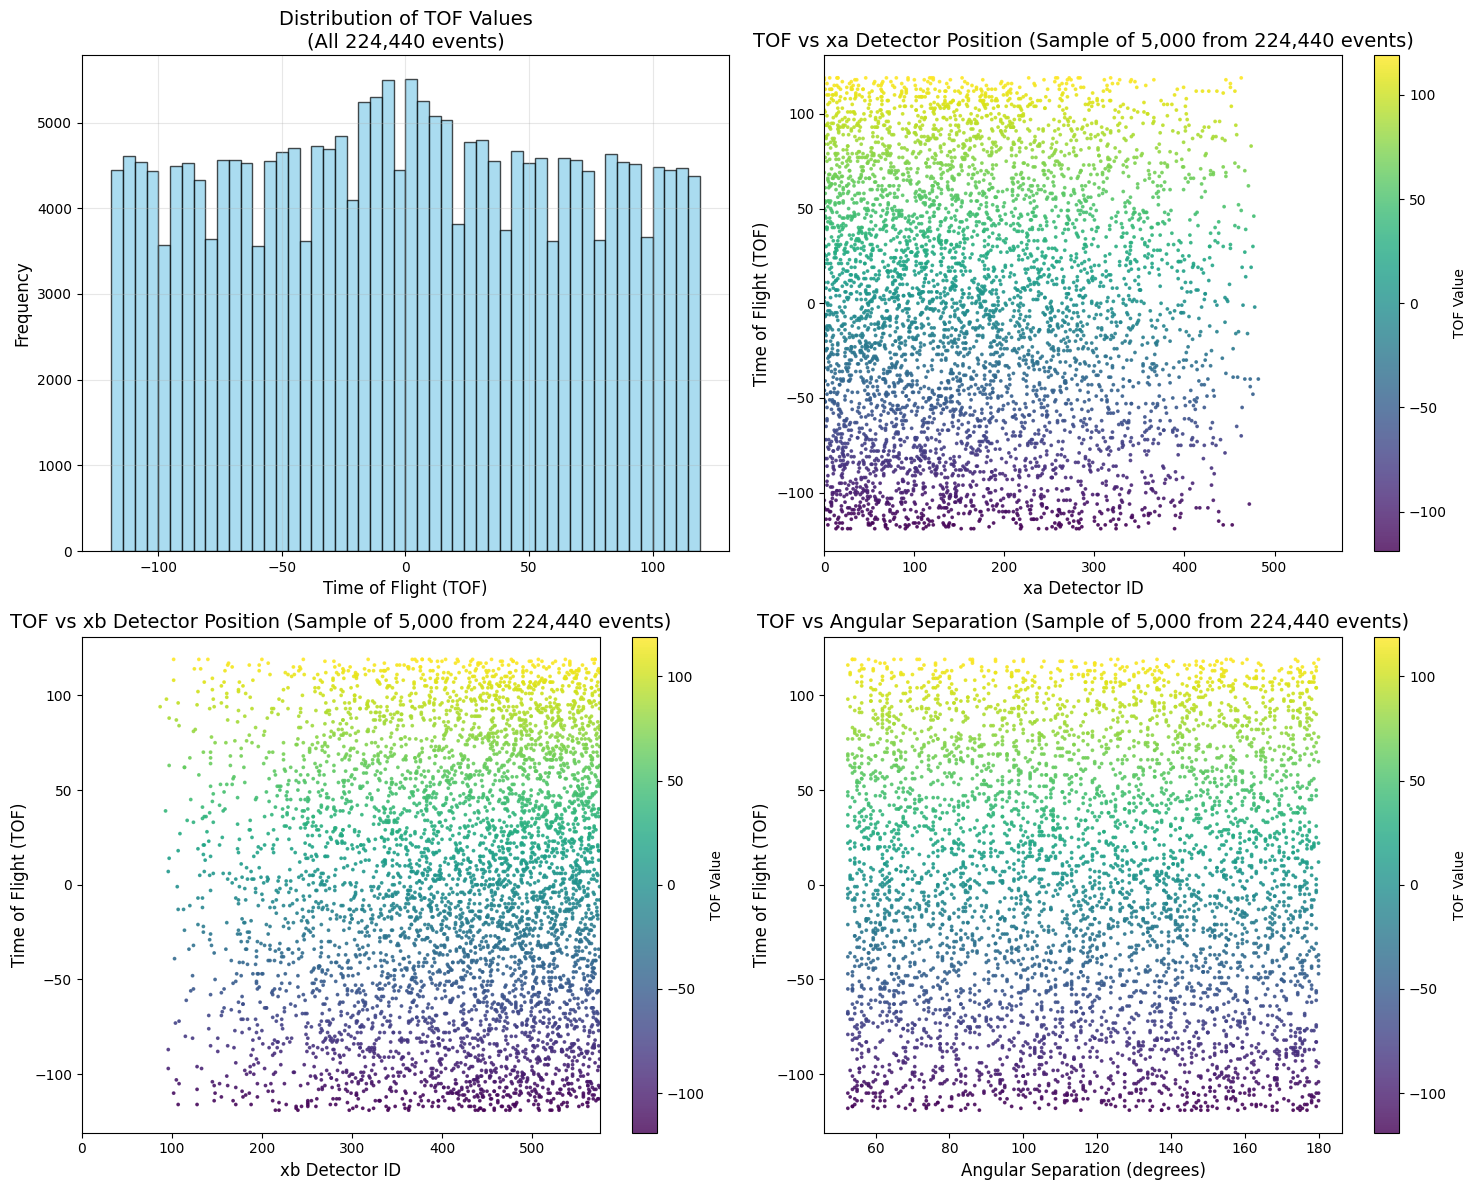


Creating 2D heatmaps with full range...


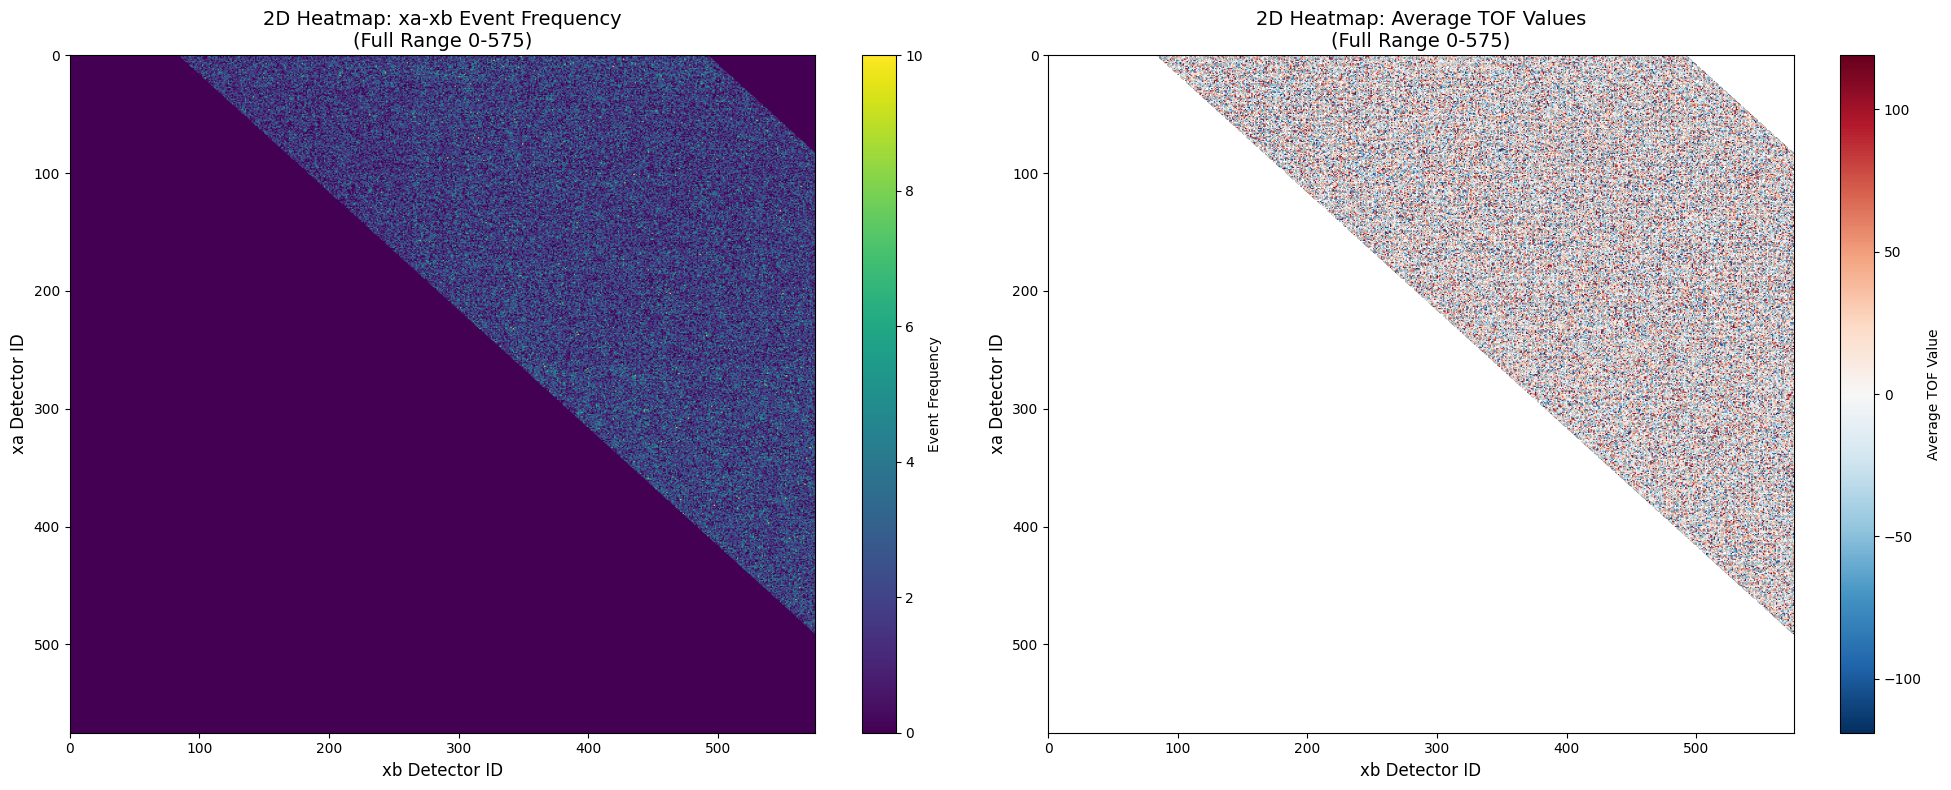


All visualizations complete!

Final summary:
- Total events analyzed: 224440
- xa detector range: 0-491 (covers 492/576 detectors)
- xb detector range: 84-575 (covers 492/576 detectors)
- TOF range: -119 to 119


In [2]:
# 3D Heatmap Visualization of PET Scanner Event Pairs with Time of Flight (TOF)
# Shows xa-xb detector pairs with tof values as the third dimension

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
import re
from google.colab import files
import plotly.io as pio

# Enable Plotly in Colab
pio.renderers.default = 'colab'

# Function to extract values from parentheses for each metric
def extract_values(line):
    pattern = r'xa\((\d+)\) xb\((\d+)\) tof\(([-]?\d+)\) za\((\d+)\) zb\((\d+)\)'
    match = re.search(pattern, line)
    if match:
        return {
            'xa': int(match.group(1)),
            'xb': int(match.group(2)),
            'tof': int(match.group(3)),
            'za': int(match.group(4)),
            'zb': int(match.group(5))
        }
    return None

# Function to process file content
def process_file_content(file_content):
    data_list = []

    for line in file_content.split('\n'):
        # Check if line contains PROMPT or DELAY and the required data
        if ('PROMPT:' in line or 'DELAY:' in line) and 'xa(' in line:
            values = extract_values(line)
            if values:
                data_list.append(values)

    # Create DataFrame
    df = pd.DataFrame(data_list)
    return df

# Function to create 3D scatter plot with matplotlib
def create_3d_scatter_matplotlib(df):
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(111, projection='3d')

    # Create scatter plot
    scatter = ax.scatter(df['xa'], df['xb'], df['tof'],
                        c=df['tof'], cmap='viridis', alpha=0.6, s=20)

    # Set labels and title
    ax.set_xlabel('xa Detector ID', fontsize=12)
    ax.set_ylabel('xb Detector ID', fontsize=12)
    ax.set_zlabel('Time of Flight (TOF)', fontsize=12)
    ax.set_title('3D Scatter Plot: xa-xb Event Pairs with TOF\n(Color represents TOF values)', fontsize=14)

    # Set axis ranges
    ax.set_xlim(0, 575)
    ax.set_ylim(0, 575)

    # Add colorbar
    plt.colorbar(scatter, ax=ax, label='TOF Value', shrink=0.5)

    return fig

# Function to create interactive 3D scatter plot with Plotly
def create_3d_scatter_plotly(df):
    # Sample data if too large for performance
    if len(df) > 5000:
        df_sample = df.sample(5000, random_state=42)
        title_suffix = f" (Sample of 5,000 from {len(df):,} events)"
    else:
        df_sample = df
        title_suffix = f" (All {len(df):,} events)"

    fig = go.Figure(data=go.Scatter3d(
        x=df_sample['xa'],
        y=df_sample['xb'],
        z=df_sample['tof'],
        mode='markers',
        marker=dict(
            size=3,
            color=df_sample['tof'],
            colorscale='Viridis',
            opacity=0.7,
            colorbar=dict(title="TOF Value")
        ),
        text=[f'xa: {xa}<br>xb: {xb}<br>TOF: {tof}'
              for xa, xb, tof in zip(df_sample['xa'], df_sample['xb'], df_sample['tof'])],
        hovertemplate='<b>Detector Pair</b><br>%{text}<extra></extra>'
    ))

    fig.update_layout(
        title=f'Interactive 3D Scatter: xa-xb Event Pairs with TOF{title_suffix}',
        scene=dict(
            xaxis_title='xa Detector ID',
            yaxis_title='xb Detector ID',
            zaxis_title='Time of Flight (TOF)',
            xaxis=dict(range=[0, 575]),
            yaxis=dict(range=[0, 575])
        ),
        width=900,
        height=700
    )

    return fig

# Function to create interactive Plotly circular PET ring visualization
def create_interactive_ring_plot_plotly(df, max_pairs=5000, tof_min=None, tof_max=None):
    """
    Create interactive circular PET ring visualization with Plotly

    Parameters:
    df: DataFrame with the data
    max_pairs: Maximum number of event pairs to start with before TOF filtering (default 5000)
    tof_min: Minimum TOF value to display (None = no filter)
    tof_max: Maximum TOF value to display (None = no filter)
    """

    # First, sample the data to reduce density (like other plots)
    if len(df) > max_pairs:
        df_sample = df.sample(max_pairs, random_state=42)
        sample_note = f"Starting with sample of {max_pairs:,} from {len(df):,} total events"
        print(f"First sampling: {max_pairs:,} events from {len(df):,} original events")
    else:
        df_sample = df.copy()
        sample_note = f"Using all {len(df):,} events"

    # Then apply TOF filtering to the sampled data
    df_filtered = df_sample.copy()
    filter_note = ""

    if tof_min is not None or tof_max is not None:
        original_sample_count = len(df_filtered)
        if tof_min is not None:
            df_filtered = df_filtered[df_filtered['tof'] >= tof_min]
        if tof_max is not None:
            df_filtered = df_filtered[df_filtered['tof'] <= tof_max]

        filter_note = f", then TOF filtered to {len(df_filtered):,} events"
        print(f"TOF filtering: {len(df_filtered):,} events remain from {original_sample_count:,} sampled events")

    final_note = sample_note + filter_note

    # Convert crystal IDs to theta (polar coordinates)
    df_plot = df_filtered.copy()
    df_plot['xa_theta'] = (df_plot['xa'] * 2 * np.pi / 576)
    df_plot['xb_theta'] = (df_plot['xb'] * 2 * np.pi / 576)

    # Convert to Cartesian coordinates for Plotly (radius = 1 for detector ring)
    df_plot['xa_x'] = np.cos(df_plot['xa_theta'])
    df_plot['xa_y'] = np.sin(df_plot['xa_theta'])
    df_plot['xb_x'] = np.cos(df_plot['xb_theta'])
    df_plot['xb_y'] = np.sin(df_plot['xb_theta'])

    # Create the figure
    fig = go.Figure()

    # Add detector ring (all 576 crystals as gray dots)
    ring_theta = np.linspace(0, 2*np.pi, 576, endpoint=False)
    ring_x = np.cos(ring_theta)
    ring_y = np.sin(ring_theta)

    fig.add_trace(go.Scatter(
        x=ring_x, y=ring_y,
        mode='markers',
        marker=dict(size=3, color='lightgray', opacity=0.4),
        name='Detector Ring',
        hovertemplate='Crystal: %{text}<extra></extra>',
        text=[f'{i}' for i in range(576)],
        showlegend=True
    ))

    # Add event pair lines
    for idx, row in df_plot.iterrows():
        fig.add_trace(go.Scatter(
            x=[row['xa_x'], row['xb_x']],
            y=[row['xa_y'], row['xb_y']],
            mode='lines',
            line=dict(color='red', width=1),
            opacity=0.3,
            showlegend=False,
            hovertemplate='<b>Event Pair</b><br>' +
                         f'xa: {row["xa"]}<br>' +
                         f'xb: {row["xb"]}<br>' +
                         f'TOF: {row["tof"]}<br>' +
                         '<extra></extra>'
        ))

    # Add xa points (blue)
    fig.add_trace(go.Scatter(
        x=df_plot['xa_x'], y=df_plot['xa_y'],
        mode='markers',
        marker=dict(size=6, color='blue', opacity=0.8),
        name='xa Detectors',
        hovertemplate='<b>xa Detector</b><br>' +
                     'Crystal: %{text}<br>' +
                     'TOF: %{customdata}<br>' +
                     '<extra></extra>',
        text=df_plot['xa'],
        customdata=df_plot['tof']
    ))

    # Add xb points (green)
    fig.add_trace(go.Scatter(
        x=df_plot['xb_x'], y=df_plot['xb_y'],
        mode='markers',
        marker=dict(size=6, color='green', opacity=0.8),
        name='xb Detectors',
        hovertemplate='<b>xb Detector</b><br>' +
                     'Crystal: %{text}<br>' +
                     'TOF: %{customdata}<br>' +
                     '<extra></extra>',
        text=df_plot['xb'],
        customdata=df_plot['tof']
    ))

    # Add module annotations
    module_positions = [0, 3, 6, 9, 12, 15]
    for mod_num in module_positions:
        crystal_pos = mod_num * 32
        theta = crystal_pos * 2 * np.pi / 576
        x_pos = 1.15 * np.cos(theta)
        y_pos = 1.15 * np.sin(theta)

        fig.add_annotation(
            x=x_pos, y=y_pos,
            text=f'Mod {mod_num}<br>Crystal {crystal_pos}',
            showarrow=False,
            font=dict(size=10),
            bgcolor="white",
            bordercolor="gray",
            borderwidth=1
        )

    # Update layout
    fig.update_layout(
        title=f'Interactive PET Scanner Event Pairs<br>{final_note}',
        width=800,
        height=800,
        xaxis=dict(
            range=[-1.3, 1.3],
            scaleanchor="y",
            scaleratio=1,
            showgrid=False,
            zeroline=False,
            showticklabels=False
        ),
        yaxis=dict(
            range=[-1.3, 1.3],
            showgrid=False,
            zeroline=False,
            showticklabels=False
        ),
        plot_bgcolor='white',
        showlegend=True,
        legend=dict(x=0.02, y=0.98)
    )

    return fig

# Function to get TOF filter parameters from user
def get_tof_filter_parameters(df):
    """
    Get TOF filtering parameters from user input
    """
    print(f"\n=== TOF FILTERING OPTIONS ===")
    print(f"Current dataset TOF range: {df['tof'].min()} to {df['tof'].max()}")
    print(f"TOF statistics:")
    print(f"  Mean: {df['tof'].mean():.1f}")
    print(f"  Median: {df['tof'].median():.1f}")
    print(f"  25th percentile: {df['tof'].quantile(0.25):.1f}")
    print(f"  75th percentile: {df['tof'].quantile(0.75):.1f}")

    print(f"\nOptions:")
    print(f"1. Show all events (no TOF filtering)")
    print(f"2. Apply custom TOF range filter")
    print(f"3. Show only negative TOF events (photon hits xb first)")
    print(f"4. Show only positive TOF events (photon hits xa first)")
    print(f"5. Show events near zero TOF (-20 to +20)")

    while True:
        try:
            choice = input("\nEnter your choice (1-5): ").strip()

            if choice == '1':
                return None, None
            elif choice == '2':
                tof_min = input(f"Enter minimum TOF value (or press Enter for no minimum): ").strip()
                tof_max = input(f"Enter maximum TOF value (or press Enter for no maximum): ").strip()

                tof_min = float(tof_min) if tof_min else None
                tof_max = float(tof_max) if tof_max else None
                return tof_min, tof_max
            elif choice == '3':
                return None, 0
            elif choice == '4':
                return 0, None
            elif choice == '5':
                return -20, 20
            else:
                print("Invalid choice. Please enter 1, 2, 3, 4, or 5.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")

# Function to create TOF distribution analysis with sampling control
def create_tof_analysis(df, max_points=5000):
    """
    Create TOF analysis plots with optional sampling for large datasets

    Parameters:
    df: DataFrame with the data
    max_points: Maximum number of points to plot in scatter plots (default 5000)
    """

    # Sample data if too large for scatter plots
    if len(df) > max_points:
        df_sample = df.sample(max_points, random_state=42)
        sample_note = f" (Sample of {max_points:,} from {len(df):,} events)"
        print(f"Note: Using random sample of {max_points:,} points for scatter plots to improve readability")
    else:
        df_sample = df
        sample_note = f" (All {len(df):,} events)"

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # 1. TOF histogram (use all data for histogram)
    ax1.hist(df['tof'], bins=50, color='skyblue', alpha=0.7, edgecolor='black')
    ax1.set_xlabel('Time of Flight (TOF)', fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)
    ax1.set_title(f'Distribution of TOF Values\n(All {len(df):,} events)', fontsize=14)
    ax1.grid(True, alpha=0.3)

    # Scatter plot parameters for better visibility
    scatter_size = max(1, min(3, 20000 / len(df_sample)))  # Adaptive size: smaller for more points
    scatter_alpha = max(0.3, min(0.8, 5000 / len(df_sample)))  # Adaptive alpha

    # 2. TOF vs xa
    scatter1 = ax2.scatter(df_sample['xa'], df_sample['tof'],
                          c=df_sample['tof'], cmap='viridis',
                          alpha=scatter_alpha, s=scatter_size)
    ax2.set_xlabel('xa Detector ID', fontsize=12)
    ax2.set_ylabel('Time of Flight (TOF)', fontsize=12)
    ax2.set_title(f'TOF vs xa Detector Position{sample_note}', fontsize=14)
    ax2.set_xlim(0, 575)
    plt.colorbar(scatter1, ax=ax2, label='TOF Value')

    # 3. TOF vs xb
    scatter2 = ax3.scatter(df_sample['xb'], df_sample['tof'],
                          c=df_sample['tof'], cmap='viridis',
                          alpha=scatter_alpha, s=scatter_size)
    ax3.set_xlabel('xb Detector ID', fontsize=12)
    ax3.set_ylabel('Time of Flight (TOF)', fontsize=12)
    ax3.set_title(f'TOF vs xb Detector Position{sample_note}', fontsize=14)
    ax3.set_xlim(0, 575)
    plt.colorbar(scatter2, ax=ax3, label='TOF Value')

    # 4. TOF vs detector pair distance
    # Calculate angular separation for sample
    df_sample_copy = df_sample.copy()
    df_sample_copy['angular_separation'] = np.minimum(
        abs(df_sample_copy['xa'] - df_sample_copy['xb']) * 360 / 576,
        360 - abs(df_sample_copy['xa'] - df_sample_copy['xb']) * 360 / 576
    )

    scatter3 = ax4.scatter(df_sample_copy['angular_separation'], df_sample_copy['tof'],
                          c=df_sample_copy['tof'], cmap='viridis',
                          alpha=scatter_alpha, s=scatter_size)
    ax4.set_xlabel('Angular Separation (degrees)', fontsize=12)
    ax4.set_ylabel('Time of Flight (TOF)', fontsize=12)
    ax4.set_title(f'TOF vs Angular Separation{sample_note}', fontsize=14)
    plt.colorbar(scatter3, ax=ax4, label='TOF Value')

    plt.tight_layout()
    return fig

# Function to create 2D heatmap with full range
def create_2d_heatmap_full_range(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # 1. Standard frequency heatmap
    heatmap_data = pd.crosstab(df['xa'], df['xb'])

    # Ensure full range 0-575 for both axes
    xa_range = range(0, 576)
    xb_range = range(0, 576)
    heatmap_full = heatmap_data.reindex(index=xa_range, columns=xb_range, fill_value=0)

    im1 = ax1.imshow(heatmap_full, cmap='viridis', aspect='auto',
                     extent=[0, 575, 575, 0], origin='upper')
    ax1.set_title('2D Heatmap: xa-xb Event Frequency\n(Full Range 0-575)', fontsize=14)
    ax1.set_xlabel('xb Detector ID', fontsize=12)
    ax1.set_ylabel('xa Detector ID', fontsize=12)
    plt.colorbar(im1, ax=ax1, label='Event Frequency')

    # 2. Average TOF heatmap
    # Create pivot table with mean TOF values
    tof_pivot = df.pivot_table(values='tof', index='xa', columns='xb', aggfunc='mean')
    tof_full = tof_pivot.reindex(index=xa_range, columns=xb_range)

    im2 = ax2.imshow(tof_full, cmap='RdBu_r', aspect='auto',
                     extent=[0, 575, 575, 0], origin='upper')
    ax2.set_title('2D Heatmap: Average TOF Values\n(Full Range 0-575)', fontsize=14)
    ax2.set_xlabel('xb Detector ID', fontsize=12)
    ax2.set_ylabel('xa Detector ID', fontsize=12)
    plt.colorbar(im2, ax=ax2, label='Average TOF Value')

    plt.tight_layout()
    return fig

# Main code execution
print("Upload the src_at_bottom_24934.txt file:")
uploaded = files.upload()

# Get the filename from the uploaded files
file_name = list(uploaded.keys())[0]
file_content = uploaded[file_name].decode('utf-8')

# Process the file content and create DataFrame
df = process_file_content(file_content)
print(f"Successfully processed the file. Created a DataFrame with {len(df)} rows.")

# Display comprehensive statistics
print("\n=== COMPREHENSIVE DATA ANALYSIS ===")
print(f"DataFrame shape: {df.shape}")
print(f"\nxa range: {df['xa'].min()} to {df['xa'].max()}")
print(f"xb range: {df['xb'].min()} to {df['xb'].max()}")
print(f"tof range: {df['tof'].min()} to {df['tof'].max()}")

print(f"\nNumber of unique xa values: {df['xa'].nunique()}")
print(f"Number of unique xb values: {df['xb'].nunique()}")
print(f"Number of unique tof values: {df['tof'].nunique()}")

print(f"\nTOF Statistics:")
print(f"Mean TOF: {df['tof'].mean():.2f}")
print(f"Median TOF: {df['tof'].median():.2f}")
print(f"Standard deviation: {df['tof'].std():.2f}")

print(f"\nSample of data:")
print(df[['xa', 'xb', 'tof']].head(10))

# Create visualizations

# 1. 3D Matplotlib scatter plot
print("\nCreating 3D matplotlib scatter plot...")
fig_3d_mpl = create_3d_scatter_matplotlib(df)
plt.show()

# 2. Interactive 3D Plotly scatter plot
print("\nCreating interactive 3D Plotly scatter plot...")
fig_3d_plotly = create_3d_scatter_plotly(df)
fig_3d_plotly.show()

# 3. Interactive circular PET ring visualization with TOF filtering
print("\nCreating interactive circular PET ring visualization...")

# Get TOF filter parameters
tof_min, tof_max = get_tof_filter_parameters(df)

# Create interactive circular plot
fig_circular_plotly = create_interactive_ring_plot_plotly(df, max_pairs=5000,
                                                         tof_min=tof_min, tof_max=tof_max)
fig_circular_plotly.show()

# 4. TOF analysis plots (with sampling control)
print("\nCreating TOF analysis plots...")
fig_tof_analysis = create_tof_analysis(df, max_points=5000)  # Adjust max_points as needed
plt.show()

# 4. 2D heatmaps with full range
print("\nCreating 2D heatmaps with full range...")
fig_2d_heatmaps = create_2d_heatmap_full_range(df)
plt.show()

print("\nAll visualizations complete!")
print(f"\nFinal summary:")
print(f"- Total events analyzed: {len(df)}")
print(f"- xa detector range: {df['xa'].min()}-{df['xa'].max()} (covers {df['xa'].nunique()}/576 detectors)")
print(f"- xb detector range: {df['xb'].min()}-{df['xb'].max()} (covers {df['xb'].nunique()}/576 detectors)")
print(f"- TOF range: {df['tof'].min()} to {df['tof'].max()}")

Anthropic AI Claude Sonnet 4  
Code v11

The function is now properly defined and should work correctly. It includes:

5,000-point sampling for large datasets
Interactive 3D scatter plot with xa, xb, and TOF
Color-coded by TOF values using the Viridis colorscale
Rich tooltips showing detector pair and TOF information
Proper axis ranges (0-575 for detectors)

Try running your notebook again - the error should be resolved and you should get all four visualizations:

✅ 3D Matplotlib scatter plot
✅ Interactive 3D Plotly scatter plot
✅ Interactive circular PET ring visualization (with TOF filtering)
✅ TOF analysis plots

The code should now run smoothly from start to finish!


My Prompt:

Can we separate the code to upload the listPrint data file into a Colab code cell of its own? I want to be able to run the code multiple times to try different tof selections and modify number of LORs plotted without repeating the time consuming upload step.

Claude:

Excellent idea! Let me separate the code into distinct cells for better workflow. Here's the reorganized structure:


Cell Organization:
Cell 1: Imports and Function Definitions

Run once: Sets up all libraries and functions
Contains: All import statements and function definitions
Output: Confirmation that functions are loaded

Cell 2: File Upload and Data Processing

Run once per file: Handles the time-consuming upload step
Contains: File upload dialog and data processing
Output: DataFrame df and comprehensive data statistics
Result: Creates the df variable for use in other cells

Cell 3: Generate All Visualizations

Run multiple times: Creates all plots with interactive TOF selection
Contains: All 5 visualization functions with user prompts
Interactive: Prompts for TOF filtering choices each time
Great for: Full analysis sessions

Cell 4: Quick Circular Plot with Custom Parameters

Run multiple times: Fast experimentation with circular plots
Contains: Direct parameter modification at the top
Perfect for: Quick testing of different TOF ranges and sample sizes
No prompts: Just modify the parameters and run

🚀 Workflow Benefits:

Upload once, analyze many times - No more repeated uploads!
Quick parameter testing - Cell 4 for rapid experimentation
Full analysis option - Cell 3 for comprehensive visualization
Modular approach - Run only what you need
Parameter persistence - Modify Cell 4 parameters and re-run instantly


In [3]:
# Cell 1: Imports and Function Definitions
# Run this cell once to set up all functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
import re
from google.colab import files
import plotly.io as pio

# Enable Plotly in Colab
pio.renderers.default = 'colab'

# Function to extract values from parentheses for each metric
def extract_values(line):
    pattern = r'xa\((\d+)\) xb\((\d+)\) tof\(([-]?\d+)\) za\((\d+)\) zb\((\d+)\)'
    match = re.search(pattern, line)
    if match:
        return {
            'xa': int(match.group(1)),
            'xb': int(match.group(2)),
            'tof': int(match.group(3)),
            'za': int(match.group(4)),
            'zb': int(match.group(5))
        }
    return None

# Function to process file content
def process_file_content(file_content):
    data_list = []

    for line in file_content.split('\n'):
        # Check if line contains PROMPT or DELAY and the required data
        if ('PROMPT:' in line or 'DELAY:' in line) and 'xa(' in line:
            values = extract_values(line)
            if values:
                data_list.append(values)

    # Create DataFrame
    df = pd.DataFrame(data_list)
    return df

# Function to create 3D scatter plot with matplotlib
def create_3d_scatter_matplotlib(df):
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(111, projection='3d')

    # Create scatter plot
    scatter = ax.scatter(df['xa'], df['xb'], df['tof'],
                        c=df['tof'], cmap='viridis', alpha=0.6, s=20)

    # Set labels and title
    ax.set_xlabel('xa Detector ID', fontsize=12)
    ax.set_ylabel('xb Detector ID', fontsize=12)
    ax.set_zlabel('Time of Flight (TOF)', fontsize=12)
    ax.set_title('3D Scatter Plot: xa-xb Event Pairs with TOF\n(Color represents TOF values)', fontsize=14)

    # Set axis ranges
    ax.set_xlim(0, 575)
    ax.set_ylim(0, 575)

    # Add colorbar
    plt.colorbar(scatter, ax=ax, label='TOF Value', shrink=0.5)

    return fig

# Function to create interactive 3D scatter plot with Plotly
def create_3d_scatter_plotly(df):
    # Sample data if too large for performance
    if len(df) > 5000:
        df_sample = df.sample(5000, random_state=42)
        title_suffix = f" (Sample of 5,000 from {len(df):,} events)"
    else:
        df_sample = df
        title_suffix = f" (All {len(df):,} events)"

    fig = go.Figure(data=go.Scatter3d(
        x=df_sample['xa'],
        y=df_sample['xb'],
        z=df_sample['tof'],
        mode='markers',
        marker=dict(
            size=3,
            color=df_sample['tof'],
            colorscale='Viridis',
            opacity=0.7,
            colorbar=dict(title="TOF Value")
        ),
        text=[f'xa: {xa}<br>xb: {xb}<br>TOF: {tof}'
              for xa, xb, tof in zip(df_sample['xa'], df_sample['xb'], df_sample['tof'])],
        hovertemplate='<b>Detector Pair</b><br>%{text}<extra></extra>'
    ))

    fig.update_layout(
        title=f'Interactive 3D Scatter: xa-xb Event Pairs with TOF{title_suffix}',
        scene=dict(
            xaxis_title='xa Detector ID',
            yaxis_title='xb Detector ID',
            zaxis_title='Time of Flight (TOF)',
            xaxis=dict(range=[0, 575]),
            yaxis=dict(range=[0, 575])
        ),
        width=900,
        height=700
    )

    return fig

# Function to create interactive Plotly circular PET ring visualization
def create_interactive_ring_plot_plotly(df, max_pairs=5000, tof_min=None, tof_max=None):
    """
    Create interactive circular PET ring visualization with Plotly

    Parameters:
    df: DataFrame with the data
    max_pairs: Maximum number of event pairs to start with before TOF filtering (default 5000)
    tof_min: Minimum TOF value to display (None = no filter)
    tof_max: Maximum TOF value to display (None = no filter)
    """

    # First, sample the data to reduce density (like other plots)
    if len(df) > max_pairs:
        df_sample = df.sample(max_pairs, random_state=42)
        sample_note = f"Starting with sample of {max_pairs:,} from {len(df):,} total events"
        print(f"First sampling: {max_pairs:,} events from {len(df):,} original events")
    else:
        df_sample = df.copy()
        sample_note = f"Using all {len(df):,} events"

    # Then apply TOF filtering to the sampled data
    df_filtered = df_sample.copy()
    filter_note = ""

    if tof_min is not None or tof_max is not None:
        original_sample_count = len(df_filtered)
        if tof_min is not None:
            df_filtered = df_filtered[df_filtered['tof'] >= tof_min]
        if tof_max is not None:
            df_filtered = df_filtered[df_filtered['tof'] <= tof_max]

        filter_note = f", then TOF filtered to {len(df_filtered):,} events"
        print(f"TOF filtering: {len(df_filtered):,} events remain from {original_sample_count:,} sampled events")

    final_note = sample_note + filter_note

    # Convert crystal IDs to theta (polar coordinates)
    df_plot = df_filtered.copy()
    df_plot['xa_theta'] = (df_plot['xa'] * 2 * np.pi / 576)
    df_plot['xb_theta'] = (df_plot['xb'] * 2 * np.pi / 576)

    # Convert to Cartesian coordinates for Plotly (radius = 1 for detector ring)
    df_plot['xa_x'] = np.cos(df_plot['xa_theta'])
    df_plot['xa_y'] = np.sin(df_plot['xa_theta'])
    df_plot['xb_x'] = np.cos(df_plot['xb_theta'])
    df_plot['xb_y'] = np.sin(df_plot['xb_theta'])

    # Create the figure
    fig = go.Figure()

    # Add detector ring (all 576 crystals as gray dots)
    ring_theta = np.linspace(0, 2*np.pi, 576, endpoint=False)
    ring_x = np.cos(ring_theta)
    ring_y = np.sin(ring_theta)

    fig.add_trace(go.Scatter(
        x=ring_x, y=ring_y,
        mode='markers',
        marker=dict(size=3, color='lightgray', opacity=0.4),
        name='Detector Ring',
        hovertemplate='Crystal: %{text}<extra></extra>',
        text=[f'{i}' for i in range(576)],
        showlegend=True
    ))

    # Add event pair lines
    for idx, row in df_plot.iterrows():
        fig.add_trace(go.Scatter(
            x=[row['xa_x'], row['xb_x']],
            y=[row['xa_y'], row['xb_y']],
            mode='lines',
            line=dict(color='red', width=1),
            opacity=0.3,
            showlegend=False,
            hovertemplate='<b>Event Pair</b><br>' +
                         f'xa: {row["xa"]}<br>' +
                         f'xb: {row["xb"]}<br>' +
                         f'TOF: {row["tof"]}<br>' +
                         '<extra></extra>'
        ))

    # Add xa points (blue)
    fig.add_trace(go.Scatter(
        x=df_plot['xa_x'], y=df_plot['xa_y'],
        mode='markers',
        marker=dict(size=6, color='blue', opacity=0.8),
        name='xa Detectors',
        hovertemplate='<b>xa Detector</b><br>' +
                     'Crystal: %{text}<br>' +
                     'TOF: %{customdata}<br>' +
                     '<extra></extra>',
        text=df_plot['xa'],
        customdata=df_plot['tof']
    ))

    # Add xb points (green)
    fig.add_trace(go.Scatter(
        x=df_plot['xb_x'], y=df_plot['xb_y'],
        mode='markers',
        marker=dict(size=6, color='green', opacity=0.8),
        name='xb Detectors',
        hovertemplate='<b>xb Detector</b><br>' +
                     'Crystal: %{text}<br>' +
                     'TOF: %{customdata}<br>' +
                     '<extra></extra>',
        text=df_plot['xb'],
        customdata=df_plot['tof']
    ))

    # Add module annotations
    module_positions = [0, 3, 6, 9, 12, 15]
    for mod_num in module_positions:
        crystal_pos = mod_num * 32
        theta = crystal_pos * 2 * np.pi / 576
        x_pos = 1.15 * np.cos(theta)
        y_pos = 1.15 * np.sin(theta)

        fig.add_annotation(
            x=x_pos, y=y_pos,
            text=f'Mod {mod_num}<br>Crystal {crystal_pos}',
            showarrow=False,
            font=dict(size=10),
            bgcolor="white",
            bordercolor="gray",
            borderwidth=1
        )

    # Update layout
    fig.update_layout(
        title=f'Interactive PET Scanner Event Pairs<br>{final_note}',
        width=800,
        height=800,
        xaxis=dict(
            range=[-1.3, 1.3],
            scaleanchor="y",
            scaleratio=1,
            showgrid=False,
            zeroline=False,
            showticklabels=False
        ),
        yaxis=dict(
            range=[-1.3, 1.3],
            showgrid=False,
            zeroline=False,
            showticklabels=False
        ),
        plot_bgcolor='white',
        showlegend=True,
        legend=dict(x=0.02, y=0.98)
    )

    return fig

# Function to create TOF distribution analysis with sampling control
def create_tof_analysis(df, max_points=5000):
    """
    Create TOF analysis plots with optional sampling for large datasets

    Parameters:
    df: DataFrame with the data
    max_points: Maximum number of points to plot in scatter plots (default 5000)
    """

    # Sample data if too large for scatter plots
    if len(df) > max_points:
        df_sample = df.sample(max_points, random_state=42)
        sample_note = f" (Sample of {max_points:,} from {len(df):,} events)"
        print(f"Note: Using random sample of {max_points:,} points for scatter plots to improve readability")
    else:
        df_sample = df
        sample_note = f" (All {len(df):,} events)"

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # 1. TOF histogram (use all data for histogram)
    ax1.hist(df['tof'], bins=50, color='skyblue', alpha=0.7, edgecolor='black')
    ax1.set_xlabel('Time of Flight (TOF)', fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)
    ax1.set_title(f'Distribution of TOF Values\n(All {len(df):,} events)', fontsize=14)
    ax1.grid(True, alpha=0.3)

    # Scatter plot parameters for better visibility
    scatter_size = max(1, min(3, 20000 / len(df_sample)))  # Adaptive size: smaller for more points
    scatter_alpha = max(0.3, min(0.8, 5000 / len(df_sample)))  # Adaptive alpha

    # 2. TOF vs xa
    scatter1 = ax2.scatter(df_sample['xa'], df_sample['tof'],
                          c=df_sample['tof'], cmap='viridis',
                          alpha=scatter_alpha, s=scatter_size)
    ax2.set_xlabel('xa Detector ID', fontsize=12)
    ax2.set_ylabel('Time of Flight (TOF)', fontsize=12)
    ax2.set_title(f'TOF vs xa Detector Position{sample_note}', fontsize=14)
    ax2.set_xlim(0, 575)
    plt.colorbar(scatter1, ax=ax2, label='TOF Value')

    # 3. TOF vs xb
    scatter2 = ax3.scatter(df_sample['xb'], df_sample['tof'],
                          c=df_sample['tof'], cmap='viridis',
                          alpha=scatter_alpha, s=scatter_size)
    ax3.set_xlabel('xb Detector ID', fontsize=12)
    ax3.set_ylabel('Time of Flight (TOF)', fontsize=12)
    ax3.set_title(f'TOF vs xb Detector Position{sample_note}', fontsize=14)
    ax3.set_xlim(0, 575)
    plt.colorbar(scatter2, ax=ax3, label='TOF Value')

    # 4. TOF vs detector pair distance
    # Calculate angular separation for sample
    df_sample_copy = df_sample.copy()
    df_sample_copy['angular_separation'] = np.minimum(
        abs(df_sample_copy['xa'] - df_sample_copy['xb']) * 360 / 576,
        360 - abs(df_sample_copy['xa'] - df_sample_copy['xb']) * 360 / 576
    )

    scatter3 = ax4.scatter(df_sample_copy['angular_separation'], df_sample_copy['tof'],
                          c=df_sample_copy['tof'], cmap='viridis',
                          alpha=scatter_alpha, s=scatter_size)
    ax4.set_xlabel('Angular Separation (degrees)', fontsize=12)
    ax4.set_ylabel('Time of Flight (TOF)', fontsize=12)
    ax4.set_title(f'TOF vs Angular Separation{sample_note}', fontsize=14)
    plt.colorbar(scatter3, ax=ax4, label='TOF Value')

    plt.tight_layout()
    return fig

# Function to create 2D heatmap with full range
def create_2d_heatmap_full_range(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # 1. Standard frequency heatmap
    heatmap_data = pd.crosstab(df['xa'], df['xb'])

    # Ensure full range 0-575 for both axes
    xa_range = range(0, 576)
    xb_range = range(0, 576)
    heatmap_full = heatmap_data.reindex(index=xa_range, columns=xb_range, fill_value=0)

    im1 = ax1.imshow(heatmap_full, cmap='viridis', aspect='auto',
                     extent=[0, 575, 575, 0], origin='upper')
    ax1.set_title('2D Heatmap: xa-xb Event Frequency\n(Full Range 0-575)', fontsize=14)
    ax1.set_xlabel('xb Detector ID', fontsize=12)
    ax1.set_ylabel('xa Detector ID', fontsize=12)
    plt.colorbar(im1, ax=ax1, label='Event Frequency')

    # 2. Average TOF heatmap
    # Create pivot table with mean TOF values
    tof_pivot = df.pivot_table(values='tof', index='xa', columns='xb', aggfunc='mean')
    tof_full = tof_pivot.reindex(index=xa_range, columns=xb_range)

    im2 = ax2.imshow(tof_full, cmap='RdBu_r', aspect='auto',
                     extent=[0, 575, 575, 0], origin='upper')
    ax2.set_title('2D Heatmap: Average TOF Values\n(Full Range 0-575)', fontsize=14)
    ax2.set_xlabel('xb Detector ID', fontsize=12)
    ax2.set_ylabel('xa Detector ID', fontsize=12)
    plt.colorbar(im2, ax=ax2, label='Average TOF Value')

    plt.tight_layout()
    return fig

# Function to get TOF filter parameters from user
def get_tof_filter_parameters(df):
    """
    Get TOF filtering parameters from user input
    """
    print(f"\n=== TOF FILTERING OPTIONS ===")
    print(f"Current dataset TOF range: {df['tof'].min()} to {df['tof'].max()}")
    print(f"TOF statistics:")
    print(f"  Mean: {df['tof'].mean():.1f}")
    print(f"  Median: {df['tof'].median():.1f}")
    print(f"  25th percentile: {df['tof'].quantile(0.25):.1f}")
    print(f"  75th percentile: {df['tof'].quantile(0.75):.1f}")

    print(f"\nOptions:")
    print(f"1. Show all events (no TOF filtering)")
    print(f"2. Apply custom TOF range filter")
    print(f"3. Show only negative TOF events (photon hits xb first)")
    print(f"4. Show only positive TOF events (photon hits xa first)")
    print(f"5. Show events near zero TOF (-20 to +20)")

    while True:
        try:
            choice = input("\nEnter your choice (1-5): ").strip()

            if choice == '1':
                return None, None
            elif choice == '2':
                tof_min = input(f"Enter minimum TOF value (or press Enter for no minimum): ").strip()
                tof_max = input(f"Enter maximum TOF value (or press Enter for no maximum): ").strip()

                tof_min = float(tof_min) if tof_min else None
                tof_max = float(tof_max) if tof_max else None
                return tof_min, tof_max
            elif choice == '3':
                return None, 0
            elif choice == '4':
                return 0, None
            elif choice == '5':
                return -20, 20
            else:
                print("Invalid choice. Please enter 1, 2, 3, 4, or 5.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")

print("✅ All functions loaded successfully!")
print("📂 Ready to upload and process PET scanner data files.")

✅ All functions loaded successfully!
📂 Ready to upload and process PET scanner data files.


In [4]:
# Cell 2: File Upload and Data Processing
# Run this cell once per file to upload and process your data
# The processed dataframe 'df' will be available for all subsequent analysis

print("Upload your PET scanner data file (e.g., src_at_bottom_24934.txt):")
uploaded = files.upload()

# Get the filename from the uploaded files
file_name = list(uploaded.keys())[0]
file_content = uploaded[file_name].decode('utf-8')

# Process the file content and create DataFrame
df = process_file_content(file_content)
print(f"\n✅ Successfully processed the file: {file_name}")
print(f"📊 Created a DataFrame with {len(df):,} rows")

# Display comprehensive statistics
print("\n=== COMPREHENSIVE DATA ANALYSIS ===")
print(f"DataFrame shape: {df.shape}")
print(f"\nxa range: {df['xa'].min()} to {df['xa'].max()}")
print(f"xb range: {df['xb'].min()} to {df['xb'].max()}")
print(f"tof range: {df['tof'].min()} to {df['tof'].max()}")

print(f"\nNumber of unique xa values: {df['xa'].nunique()}")
print(f"Number of unique xb values: {df['xb'].nunique()}")
print(f"Number of unique tof values: {df['tof'].nunique()}")

print(f"\nTOF Statistics:")
print(f"Mean TOF: {df['tof'].mean():.2f}")
print(f"Median TOF: {df['tof'].median():.2f}")
print(f"Standard deviation: {df['tof'].std():.2f}")

print(f"\nSample of data:")
print(df[['xa', 'xb', 'tof']].head(10))

print(f"\n🎯 Data processing complete!")
print(f"📈 You can now run the visualization cells multiple times with different parameters.")

Upload your PET scanner data file (e.g., src_at_bottom_24934.txt):


Saving listPrint_Randoms2min_250k.txt to listPrint_Randoms2min_250k (2).txt

✅ Successfully processed the file: listPrint_Randoms2min_250k (2).txt
📊 Created a DataFrame with 224,440 rows

=== COMPREHENSIVE DATA ANALYSIS ===
DataFrame shape: (224440, 5)

xa range: 0 to 491
xb range: 84 to 575
tof range: -119 to 119

Number of unique xa values: 492
Number of unique xb values: 492
Number of unique tof values: 239

TOF Statistics:
Mean TOF: -0.08
Median TOF: 0.00
Standard deviation: 67.66

Sample of data:
    xa   xb  tof
0   43  340  -31
1  311  440   51
2  364  503  -64
3   67  511   89
4   35  187  -17
5   69  391  -47
6  243  457  -14
7   82  443   50
8  392  528   28
9   34  447  -90

🎯 Data processing complete!
📈 You can now run the visualization cells multiple times with different parameters.


🎨 Creating all PET scanner visualizations...

1️⃣ Creating 3D matplotlib scatter plot...


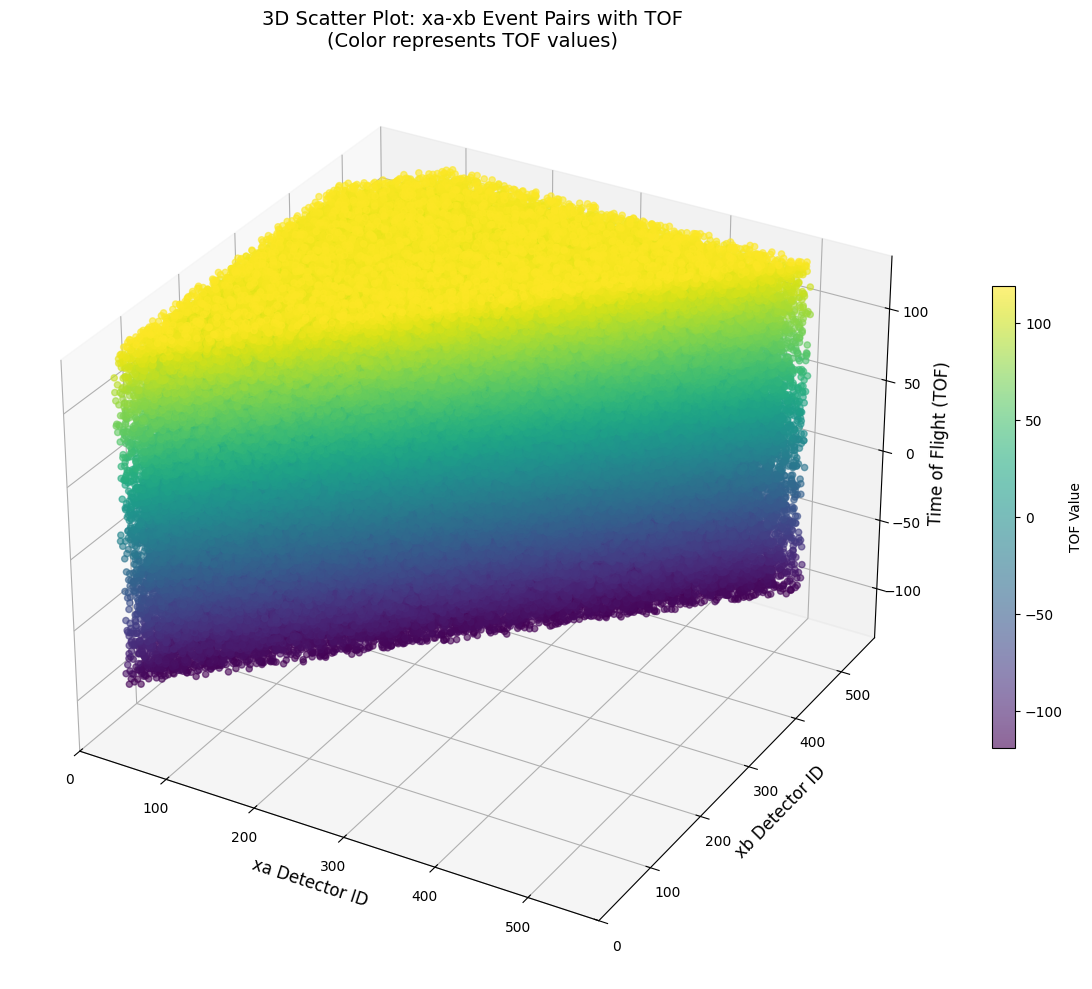


2️⃣ Creating interactive 3D Plotly scatter plot...



3️⃣ Creating interactive circular PET ring visualization...

=== TOF FILTERING OPTIONS ===
Current dataset TOF range: -119 to 119
TOF statistics:
  Mean: -0.1
  Median: 0.0
  25th percentile: -57.0
  75th percentile: 57.0

Options:
1. Show all events (no TOF filtering)
2. Apply custom TOF range filter
3. Show only negative TOF events (photon hits xb first)
4. Show only positive TOF events (photon hits xa first)
5. Show events near zero TOF (-20 to +20)

Enter your choice (1-5): 20
Invalid choice. Please enter 1, 2, 3, 4, or 5.

Enter your choice (1-5): 30
Invalid choice. Please enter 1, 2, 3, 4, or 5.

Enter your choice (1-5): 2
Enter minimum TOF value (or press Enter for no minimum): 20
Enter maximum TOF value (or press Enter for no maximum): 30
First sampling: 2,000 events from 224,440 original events
TOF filtering: 88 events remain from 2,000 sampled events



4️⃣ Creating TOF analysis plots...
Note: Using random sample of 5,000 points for scatter plots to improve readability


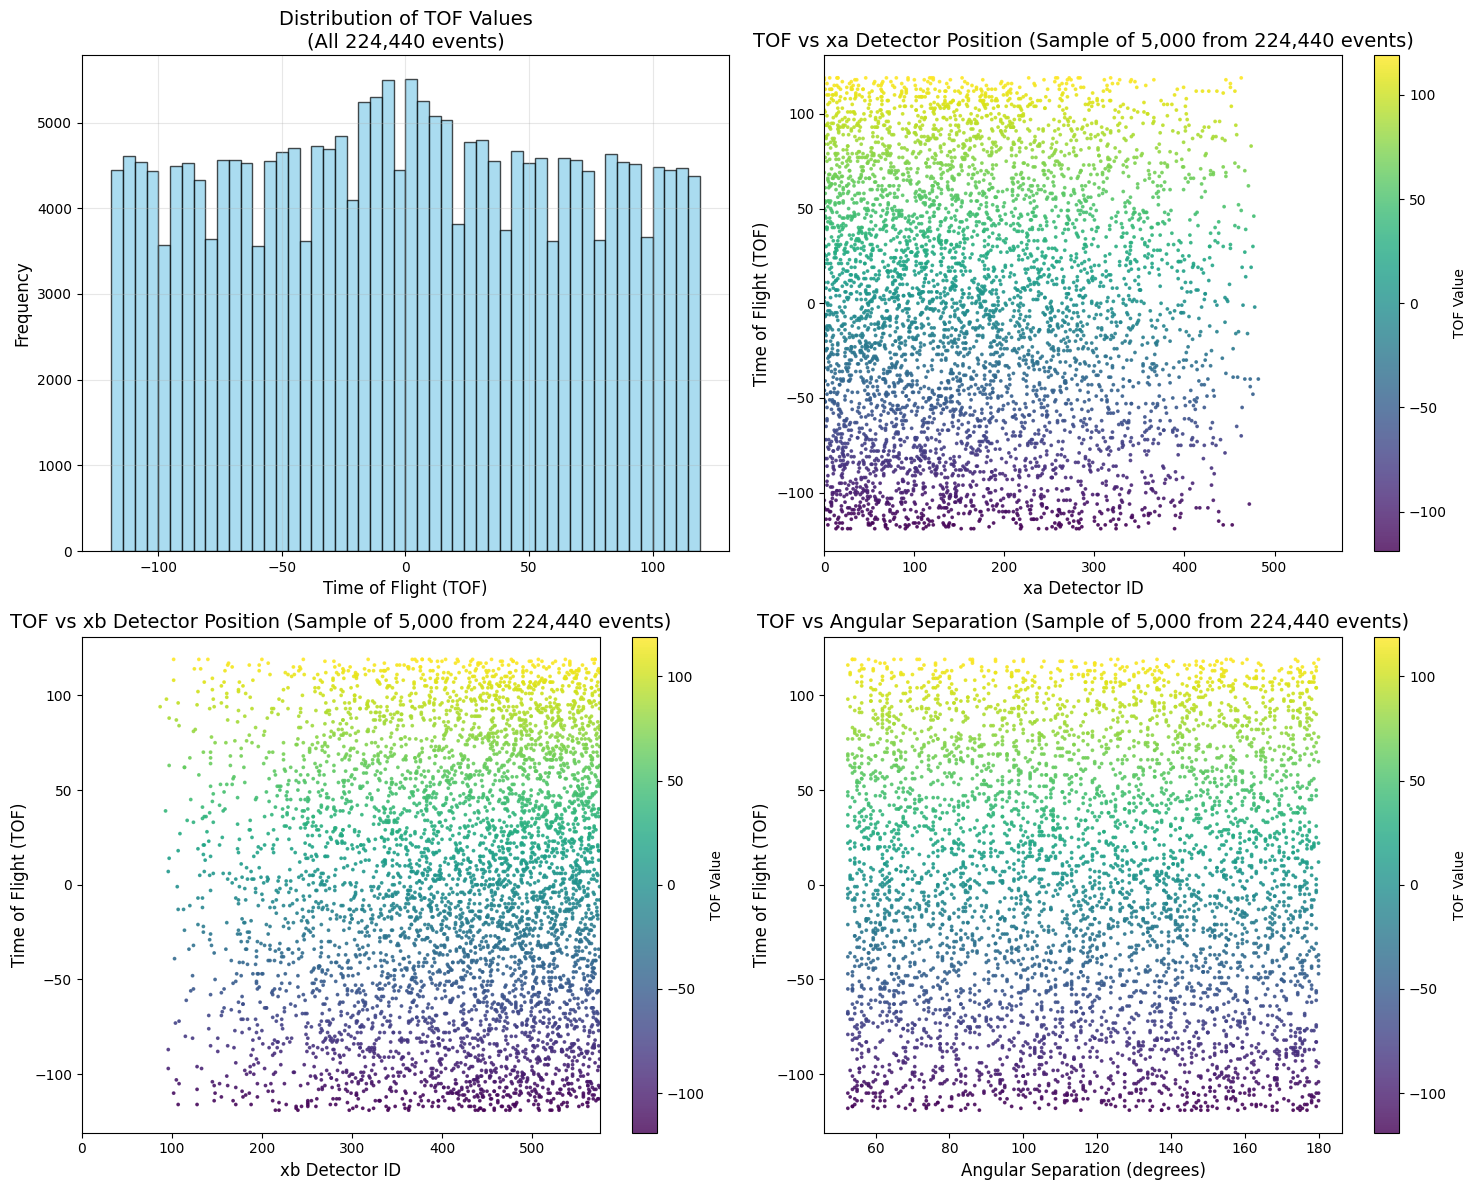


5️⃣ Creating 2D heatmaps with full range...


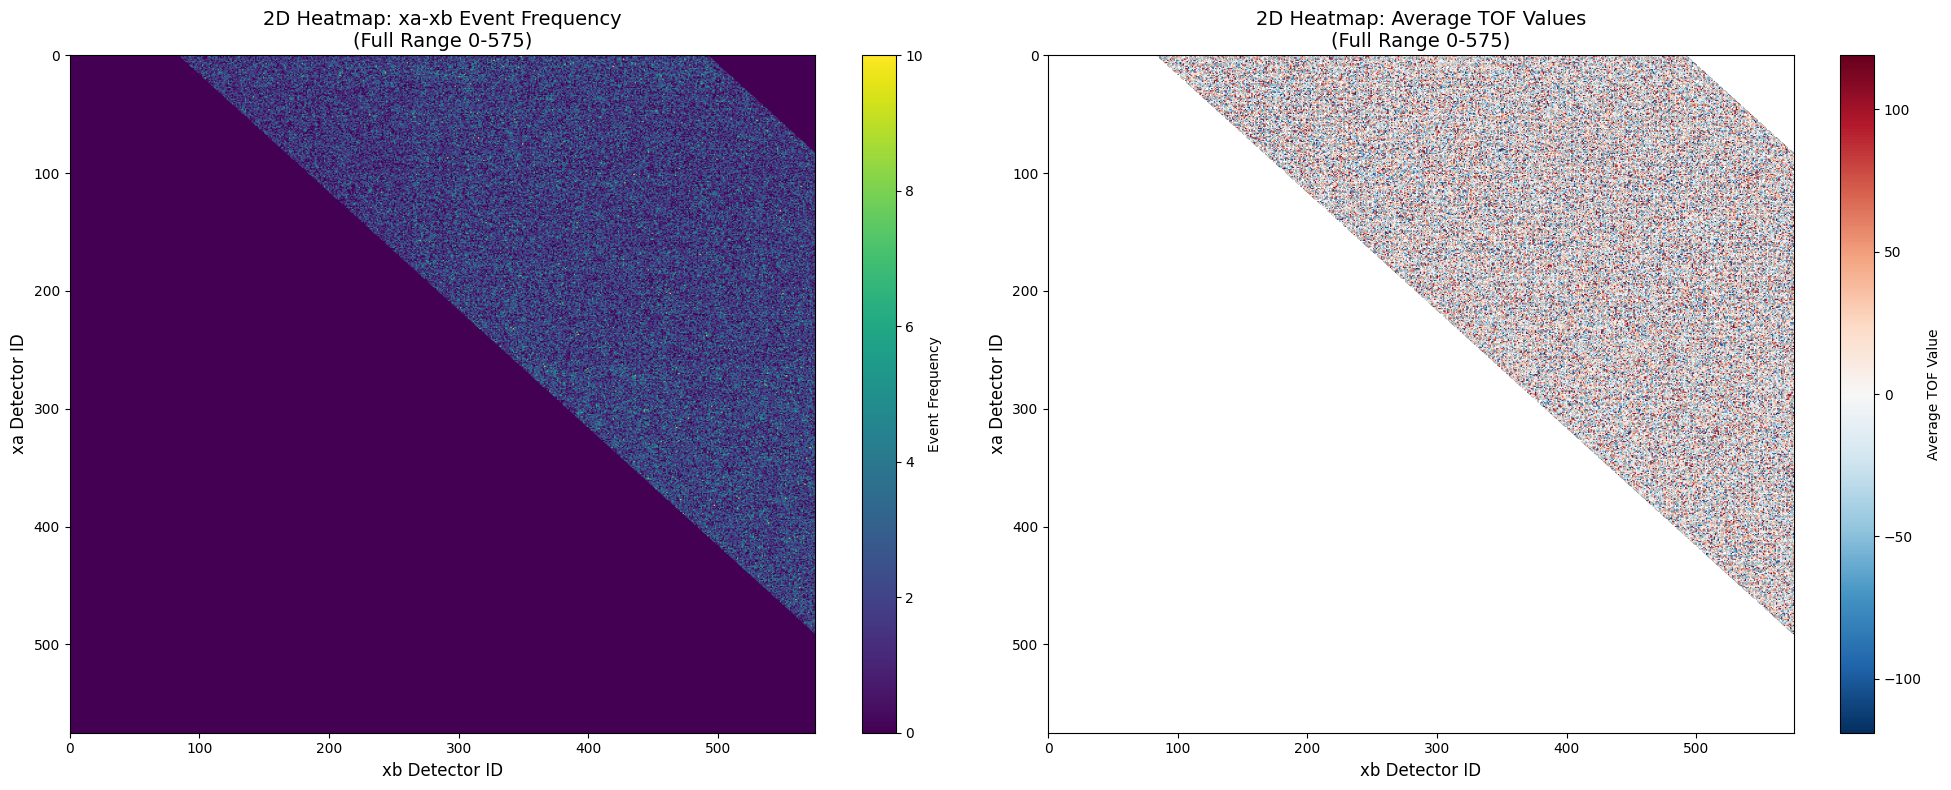


🎉 All visualizations complete!
💡 To try different TOF filters or modify parameters, simply run this cell again.


In [7]:
# Cell 3: Generate All Visualizations
# Run this cell to create all plots with interactive TOF filtering
# You can run this cell multiple times with different TOF filter choices

print("🎨 Creating all PET scanner visualizations...")

# 1. 3D Matplotlib scatter plot
print("\n1️⃣ Creating 3D matplotlib scatter plot...")
fig_3d_mpl = create_3d_scatter_matplotlib(df)
plt.show()

# 2. Interactive 3D Plotly scatter plot
print("\n2️⃣ Creating interactive 3D Plotly scatter plot...")
fig_3d_plotly = create_3d_scatter_plotly(df)
fig_3d_plotly.show()

# 3. Interactive circular PET ring visualization with TOF filtering
print("\n3️⃣ Creating interactive circular PET ring visualization...")

# Get TOF filter parameters
tof_min, tof_max = get_tof_filter_parameters(df)

# Create interactive circular plot
fig_circular_plotly = create_interactive_ring_plot_plotly(df, max_pairs=2000,
                                                         tof_min=tof_min, tof_max=tof_max)
fig_circular_plotly.show()

# 4. TOF analysis plots (with sampling control)
print("\n4️⃣ Creating TOF analysis plots...")
fig_tof_analysis = create_tof_analysis(df, max_points=5000)
plt.show()

# 5. 2D heatmaps with full range
print("\n5️⃣ Creating 2D heatmaps with full range...")
fig_2d_heatmaps = create_2d_heatmap_full_range(df)
plt.show()

print("\n🎉 All visualizations complete!")
print(f"💡 To try different TOF filters or modify parameters, simply run this cell again.")

In [10]:
# Cell 4: Quick Circular Plot with Custom Parameters
# Run this cell for quick circular plot generation with manual parameter control
# Modify the parameters below and run to quickly test different settings

# ========== MODIFY THESE PARAMETERS ==========
MAX_PAIRS = 2000        # Number of events to sample (try 1000, 3000, 5000, etc.)
TOF_MIN = -5           # Minimum TOF value (None for no limit)
TOF_MAX = 5            # Maximum TOF value (None for no limit)

# Examples of parameter combinations to try:
# Very tight TOF filter:     TOF_MIN = -10, TOF_MAX = 10
# Negative TOF only:         TOF_MIN = None, TOF_MAX = 0
# Positive TOF only:         TOF_MIN = 0, TOF_MAX = None
# Wide range:                TOF_MIN = -50, TOF_MAX = 50
# No TOF filtering:          TOF_MIN = None, TOF_MAX = None

# Fewer events for clarity:  MAX_PAIRS = 1000
# More events for detail:    MAX_PAIRS = 7000
# ============================================

print(f"🎯 Quick Circular Plot Generation")
print(f"📊 Parameters: {MAX_PAIRS:,} max events, TOF range: {TOF_MIN} to {TOF_MAX}")

# Create the plot with specified parameters
fig_circular = create_interactive_ring_plot_plotly(df,
                                                  max_pairs=MAX_PAIRS,
                                                  tof_min=TOF_MIN,
                                                  tof_max=TOF_MAX)
fig_circular.show()

print(f"✅ Circular plot complete!")
print(f"💡 Modify the parameters at the top of this cell and run again to experiment.")

🎯 Quick Circular Plot Generation
📊 Parameters: 2,000 max events, TOF range: -5 to 5
First sampling: 2,000 events from 224,440 original events
TOF filtering: 110 events remain from 2,000 sampled events


✅ Circular plot complete!
💡 Modify the parameters at the top of this cell and run again to experiment.


My Prompt:

Very Good! For the Quick Circular Plot in cell4, can we add the heat map scatter plot for 'TOF vs Angular Separation' using the same filtered data plotted in the Quick Circular Plot?

Claude:

Excellent idea! Adding the TOF vs Angular Separation plot with the same filtered data will give you a perfect correlation view. Let me modify Cell 4 to include both visualizations:




🎯 Quick Analysis: Circular Plot + TOF vs Angular Separation
📊 Parameters: 2,000 max events, TOF range: -119 to -90
First sampling: 2,000 events from 224,440 original events
TOF filtering: 232 events remain from 2,000 sampled events
📈 Final dataset for visualization: 232 events

🔵 Creating circular plot...
First sampling: 2,000 events from 224,440 original events
TOF filtering: 232 events remain from 2,000 sampled events



📐 Creating TOF vs Angular Separation plot (same filtered data)...


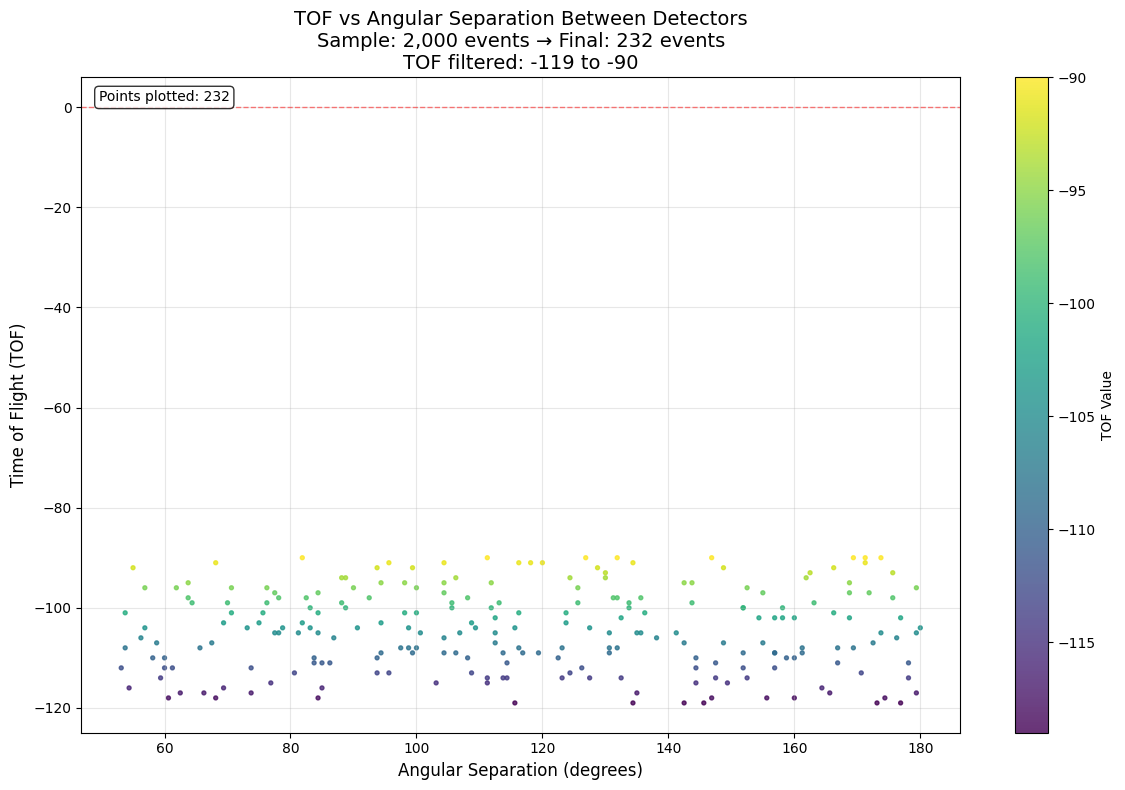


✅ Both visualizations complete!
🔍 Both plots use exactly the same 232 filtered events
💡 Modify the parameters at the top of this cell and run again to experiment.

📊 Filtered Data Statistics:
   TOF range: -119 to -90
   Angular separation range: 53.1° to 180.0°
   Mean TOF: -104.4
   Mean angular separation: 117.5°


In [13]:
# Cell 4: Quick Circular Plot with Custom Parameters + TOF vs Angular Separation
# Run this cell for quick circular plot generation with manual parameter control
# Includes TOF vs Angular Separation scatter plot using the same filtered data

# ========== MODIFY THESE PARAMETERS ==========
MAX_PAIRS = 2000        # Number of events to sample (try 1000, 3000, 5000, etc.)
TOF_MIN = -119           # Minimum TOF value (None for no limit)
TOF_MAX = -90            # Maximum TOF value (None for no limit)

# Examples of parameter combinations to try:
# Very tight TOF filter:     TOF_MIN = -10, TOF_MAX = 10
# Negative TOF only:         TOF_MIN = None, TOF_MAX = 0
# Positive TOF only:         TOF_MIN = 0, TOF_MAX = None
# Wide range:                TOF_MIN = -50, TOF_MAX = 50
# No TOF filtering:          TOF_MIN = None, TOF_MAX = None

# Fewer events for clarity:  MAX_PAIRS = 1000
# More events for detail:    MAX_PAIRS = 7000
# ============================================

print(f"🎯 Quick Analysis: Circular Plot + TOF vs Angular Separation")
print(f"📊 Parameters: {MAX_PAIRS:,} max events, TOF range: {TOF_MIN} to {TOF_MAX}")

# Step 1: Apply the same filtering logic as the circular plot
# First, sample the data to reduce density
if len(df) > MAX_PAIRS:
    df_sample = df.sample(MAX_PAIRS, random_state=42)
    print(f"First sampling: {MAX_PAIRS:,} events from {len(df):,} original events")
else:
    df_sample = df.copy()
    print(f"Using all {len(df):,} events")

# Then apply TOF filtering to the sampled data
df_filtered = df_sample.copy()

if TOF_MIN is not None or TOF_MAX is not None:
    original_sample_count = len(df_filtered)
    if TOF_MIN is not None:
        df_filtered = df_filtered[df_filtered['tof'] >= TOF_MIN]
    if TOF_MAX is not None:
        df_filtered = df_filtered[df_filtered['tof'] <= TOF_MAX]

    print(f"TOF filtering: {len(df_filtered):,} events remain from {original_sample_count:,} sampled events")

print(f"📈 Final dataset for visualization: {len(df_filtered):,} events")

# Step 2: Create the circular plot
print(f"\n🔵 Creating circular plot...")
fig_circular = create_interactive_ring_plot_plotly(df,
                                                  max_pairs=MAX_PAIRS,
                                                  tof_min=TOF_MIN,
                                                  tof_max=TOF_MAX)
fig_circular.show()

# Step 3: Create TOF vs Angular Separation plot using the SAME filtered data
print(f"\n📐 Creating TOF vs Angular Separation plot (same filtered data)...")

# Calculate angular separation for the filtered data
df_angular = df_filtered.copy()
df_angular['angular_separation'] = np.minimum(
    abs(df_angular['xa'] - df_angular['xb']) * 360 / 576,
    360 - abs(df_angular['xa'] - df_angular['xb']) * 360 / 576
)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

# Adaptive scatter parameters based on data size
scatter_size = max(1, min(8, 15000 / len(df_angular)))
scatter_alpha = max(0.4, min(0.8, 3000 / len(df_angular)))

scatter = ax.scatter(df_angular['angular_separation'], df_angular['tof'],
                    c=df_angular['tof'], cmap='viridis',
                    alpha=scatter_alpha, s=scatter_size)

ax.set_xlabel('Angular Separation (degrees)', fontsize=12)
ax.set_ylabel('Time of Flight (TOF)', fontsize=12)

# Create detailed title with parameters
filter_text = ""
if TOF_MIN is not None or TOF_MAX is not None:
    filter_text = f"\nTOF filtered: {TOF_MIN if TOF_MIN is not None else 'min'} to {TOF_MAX if TOF_MAX is not None else 'max'}"

ax.set_title(f'TOF vs Angular Separation Between Detectors\n'
            f'Sample: {MAX_PAIRS:,} events → Final: {len(df_angular):,} events{filter_text}',
            fontsize=14)

plt.colorbar(scatter, ax=ax, label='TOF Value')
ax.grid(True, alpha=0.3)

# Add some helpful annotations
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1)
ax.text(0.02, 0.98, f'Points plotted: {len(df_angular):,}',
        transform=ax.transAxes, fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8),
        verticalalignment='top')

plt.tight_layout()
plt.show()

print(f"\n✅ Both visualizations complete!")
print(f"🔍 Both plots use exactly the same {len(df_filtered):,} filtered events")
print(f"💡 Modify the parameters at the top of this cell and run again to experiment.")

# Display some quick statistics about the filtered data
print(f"\n📊 Filtered Data Statistics:")
print(f"   TOF range: {df_filtered['tof'].min()} to {df_filtered['tof'].max()}")
print(f"   Angular separation range: {df_angular['angular_separation'].min():.1f}° to {df_angular['angular_separation'].max():.1f}°")
print(f"   Mean TOF: {df_filtered['tof'].mean():.1f}")
print(f"   Mean angular separation: {df_angular['angular_separation'].mean():.1f}°")

Enhanced Cell 4 Features:
1. Dual Visualization Approach

Circular Plot: Interactive Plotly ring visualization
TOF vs Angular Separation: Matplotlib scatter plot
Same Data: Both plots use identical filtered events for perfect correlation

2. Transparent Data Processing

Step-by-step filtering: Shows exactly how data is processed
Consistent logic: Uses the same filtering as the circular plot function
Progress reporting: Displays counts at each filtering stage

3. Enhanced TOF vs Angular Separation Plot

Adaptive parameters: Dot size and transparency adjust to data density
Detailed title: Shows sample size and filtering parameters
Reference line: Red dashed line at TOF = 0 for easy reference
Data count overlay: Shows exactly how many points are plotted
Color-coded: Same viridis colorscale as other plots

4. Summary Statistics

Filtered data stats: TOF and angular separation ranges
Mean values: Quick overview of the filtered dataset
Event counts: Clear tracking from original → sampled → filtered

💡 Perfect for Correlative Analysis:
Now you can easily see:

Geometric patterns in the circular plot
Quantitative relationships in the scatter plot
Direct correlation between detector positions and timing
Filter effects on both spatial and temporal distributions